# Logistic lost

In [1]:
import numpy as np
%matplotlib widget
from matplotlib import cm
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('./deeplearning.mplstyle')

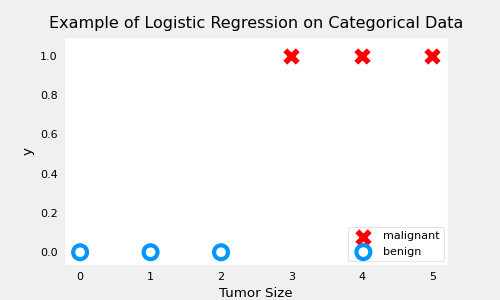

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.longdouble)
plt_simple_example(x_train, y_train)

In [3]:
x = x_train.reshape(-1, 1)
x @ np.array([1]) + 1

array([1., 2., 3., 4., 5., 6.], dtype=float128)

In [4]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1.0/(1.0+np.exp(-z))
    return g

In [5]:
def cost_logistic_sq_err(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f = sigmoid(z)
    e = f - y
    cost = (e**2)/(2*m)
    return cost.sum()

In [6]:
# logistic squared error cost
w = np.linspace(-6, 12, 50)
b = np.linspace(10, -20, 40)
ww, bb = np.meshgrid(w, b)
points = np.c_[ww.ravel(), bb.ravel()]
costs = np.zeros(points.shape[0])
for i in range(points.shape[0]):
    w, b = points[i]
    costs[i] = cost_logistic_sq_err(x_train, y_train, w, b)
cost = costs.reshape(ww.shape)

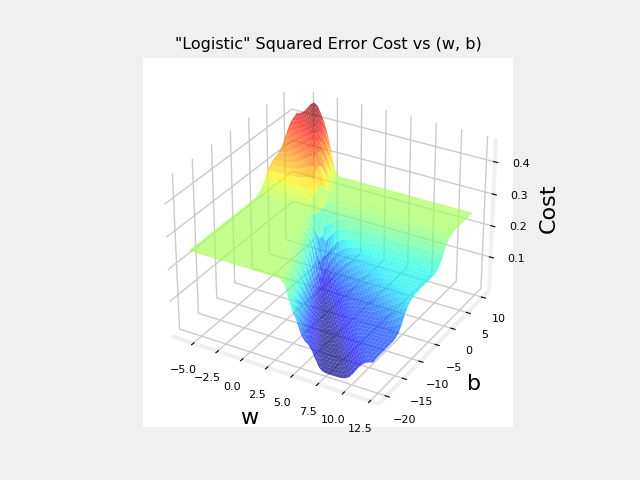

In [7]:
fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(ww, bb, cost, alpha=0.7, cmap=cm.jet,)
ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.show()

In [8]:
def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out = np.zeros_like(x, dtype=float)
    i = x <= maximum
    ni = np.logical_not(i)

    out[i] = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out

In [9]:
import numpy as np


def compute_cost(X, y, w, b, logistic=False, safe=True):
    m = X.shape[0]
    y = y.reshape(-1, 1)             # ensure 2D
    w = w.reshape(-1, 1)             # ensure 2D
    if logistic:
        if safe:  # safe from overflow
            z = X @ w + b
            cost = -(y*z) + log_1pexp(z)  # imp  imp  imp
            cost = np.sum(cost)/m
        else:
            # (m,n)(n,1) = (m,1)
            f = sigmoid(X @ w + b)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) -
                          np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0, 0]
    else:
        f = X @ w + b
        cost = (1 / (2 * m)) * np.sum(np.square(f - y))

    return cost

In [10]:
# logistic cost
w = np.linspace(-6, 12, 50)
b = np.linspace(10, -20, 40)
ww, bb = np.meshgrid(w, b)
points = np.c_[ww.ravel(), bb.ravel()]
costs = np.zeros(points.shape[0])
for i in range(points.shape[0]):
    w, b = points[i]
    costs[i] = compute_cost(x_train.reshape(-1, 1),
                            y_train, w, b,  logistic=True, safe=True)
cost = costs.reshape(ww.shape)

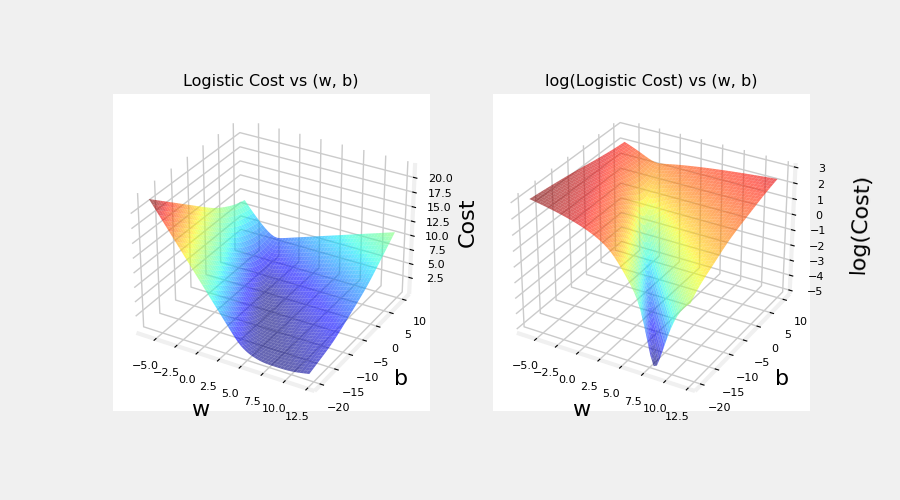

In [11]:
fig = plt.figure(figsize=(9, 5))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww, bb, cost, alpha=0.6, cmap=cm.jet,)

ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('Logistic Cost vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(ww, bb, np.log(cost), alpha=0.6, cmap=cm.jet,)

ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel('\nlog(Cost)', fontsize=16)
ax.set_title('log(Logistic Cost) vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.show()